# Taylor Series Approximations

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:
* Understand derivatives and Taylor Series approximations.
* Rearrange Taylor Series approximations and simplify with Big-O notation.
* Compare the error in Taylor Series approximations to the exact solution.

## Motivation

### Class Roadmap

In the first chapter, we learned how to plan algorithms with pseudocode to write Python code:
* Getting Started in Python
* Functions, Scoping, and Recursion
* Numpy and Matplotlib
* Dictionaries and Functions as Arguments

We then reviewed mathematical modeling of chemical engineering systems:
* Mathematical Modeling: Linear and Algebriac Equations

And then we learned how to efficiently solve systems of linear equations numerically:
* Gaussian Elimination
* LU Factorization

In **this notebook and the following**, we will learn how to numerically approximate derivatives:
* Taylor Series and Finite Difference Approximations

In future notebooks, we will see that algorithms to *solve nonlinear and integration problems* build on two core concepts:
* Numeric approximations of derivatives
* Solving a series of linear systems

We will also review Taylor series approximations in this notebook, which are used throughout the class.

### Why numeric approximation?

You may recall that calculus usually deals with limits of some quantity that can be made arbitrarily small.  Nevertheless, when dealing with numerical methods we never actually have an infinitesimal value, rather we can only make quantities finitely small.  This introduces a **necessary approximation** whenever we do calculus on a computer. This contrasts to the direct solution of linear equations where we get the exact solution, up to computer round off.  In calculus we have additional errors as we will see in our first example of numerical calculus: the estimation of derivatives.

## Calculus Revisited: Derivatives and Taylor Series

### The definition of a derivative

You may recall from Calculus I that a derivative is defined as the following limit

$$ f'(x) = \frac{df}{dx} = \lim_{h\rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$

On a computer we cannot evaluate the derivative using an infinitesimally small value for $h$.  The formulae that we derive will be called **finite difference derivatives** because $h$ will have a finite value rather than an infinitesimally small one. In one of our formulae we will approximate the derivative in the same manner as the above equation using
$$ f'(x) \approx \frac{f(x+h) - f(x)}{h}.$$ The error we incur in doing so will also be discussed.

### Taylor Series and Big-O notation

For a function $f(x)$ we can approximate it near a point $x$ using the Taylor series

$$f(x + h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x) + \dots.$$

One way that this is commonly written is using a particular notation instead of the "$\dots$":

$$f(x + h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x) + O(h^4).$$

The $O(h^4)$ means that the rest of the terms will be proportional to $h^4$ as $h\rightarrow 0$.  We can see this through a simple example via Python.

### Example: Approximating Cosine

Consider $f(x) = \cos(x)$.

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Analytically compute the first three derivatives of $f(x)$. Hint: you may need to look up some basic differentiation rules. Then evaluate the derivates at $x=0$. Record your answer in the text/Markdown cell below.
</div>

**Home Activity Answers**

(keep in terms of $x$) $f'(x) = $

(substitute to remove $x$) $f'(0) = $

$f''(x) = $

$f''(0) = $

$f'''(x) = $

$f'''(0) = $

We will now construct a Taylor series appoximation to $f(x) = \cos(x)$ centered at the point $x=0$. We do this by substituting the values you calculated in the Home Activity into the general Taylor series formula:

$$f(x + h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x) + O(h^4)$$

To obtain:

$$\cos h \approx \cos 0 - h \sin 0 - \frac{h^2}{2} \cos 0 + \frac{h^3}{6} \sin 0 + O(h^4)$$

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Watch the first 6 minutes of <a href = "https://youtu.be/3d6DsjIBzJ4">this video</a> then answer the questions below. You many need to search YouTube for <i>3BLUE1BROWN SERIES, S2 E11, Taylor series</i> if the link has issues.
</div>

**Home Multiple Choice Questions**:

At $x = 0$ and $h = 0$, which derivates of our Taylor series and the true function f$(x)$ match exactly? Choose all that apply:
1. First derivatives match
2. Second derivates match
3. Third derivates match
4. Fourth derivates match
5. Fifth derivates match

Record your answer below in the Python list `my_answer`. Please use only integers (no decimals!).

In [1]:
# Add your solution here

In [2]:
# Removed autograder test. You may delete this cell.

We will now plot the difference between $\cos h$ and the third-order Taylor series as a function of $h$ on a log-log scale. Please take a few minutes to study the code below. Carefully read the comments.

The Slope of the error on log-log scale is 3.9974955061239656


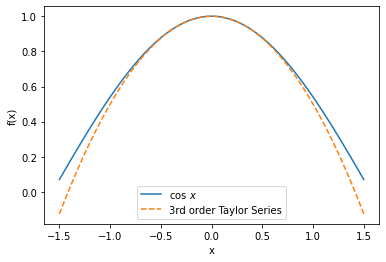

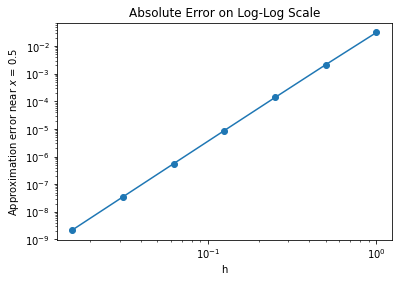

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
#this next line is only needed in iPython notebooks
%matplotlib inline 
import matplotlib
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick

def hide_spines(intx=False,inty=False):
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes.
    
    You do not need to understand how this function works. For now, just think
    'this function helps format the plots'.
    """

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font, size=18) 
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
           # ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

# Define the function of interest and its derivates
f = lambda x: np.cos(x)
fprime =  lambda x: -np.sin(x)
fprime2 =  lambda x: -np.cos(x)
fprime3 =  lambda x: np.sin(x)

# Define the domain to investigate x
# Recall the syntax of linspace: start at -1.5 and end at 1.5 with 100 evenly spaced points
x = np.linspace(-1.5,1.5,100)

## Create first figure
plt.figure()

# Plot the true function
plt.plot(x,f(x),label="$\cos \,x$")

# Plot the Taylor series approximation
plt.plot(x,f(0) + x*fprime(0) + x**2/2*fprime2(0) + x**3/6*fprime3(0),
         "--",label="3rd order Taylor Series")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("f(x)")

## end first figure

## Second figure: approximation error versus perturbation size h

# Define the values of h to try. Recall '**' means 'raised to the power'
h = 2**np.array([0,-1.0,-2,-3,-4,-5,-6])

# Create two arrays of zeros to store the results
fapprox = 0*h
fexact = 0*h

# Set counter to zero
count = 0

# Specify value of x to compute approximation error
x = 0.5

# loop over values of h
for i in h:
    
    # calculate approximation for f(x + h)
    fapprox[count] = f(x) + i * fprime(x) + 0.5*i**2*fprime2(x) + 1.0/6.0*i**3*fprime3(x)
    
    # calculate true function value, i.e., f(x+h) 
    fexact[count] = f(x+i)
    
    # increase counter by 1
    count += 1
    
# calculate absolute value of error
errors = np.fabs(fapprox-fexact)

# Create second figure
plt.figure()
plt.loglog(h,errors,'o-')
plt.title("Absolute Error on Log-Log Scale")
plt.xlabel("h")
plt.ylabel("Approximation error near $x$ = " + str(x))
print("The Slope of the error on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))

## End second figure


<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Write at least one question you have about the code above.
</div>

**Home Activity Answer**:

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 With your neighbor, walk through the code together. For the first five minutes, one person should explain the code to the other person. After 5 minutes, switch roles. As you go, discuss the questions you wrote down during the home activity. Make a list of questions to ask in class.
</div>

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Using the definition of a Taylor series, show why the slope in the above graph is very close to 4.
</div>

You might ask yourself, why is the slope 4?  Let's look at the equation for the error:
$$f(x+h) - \left(f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x)\right) = C h^4 + O(h^5),$$
in this equation we have used the fact that $O(h^4)$ means some constant, which here we call $C$, times $h^4$. The remaining terms we have written as $O(h^5)$.

When we take the absolute value and the logarithm of each side we get
$$\log_{10}\left|f(x+h) - \left(f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x)\right)\right| \approx \log_{10}|C| + 4 \log_{10}h,$$ which is a line with slope 4.  The constant tells us what level the curve starts out at when $h=1$. This formula is approximate because we have left out the $h^5$ and higher terms, which we assume to be small since $h$ is small in our demonstration above. 